In [1]:
import numpy as np
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Activation, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_path = 'datasets/Oranges/Train'
test_path = 'datasets/Oranges/Test'

In [3]:
train_datagen = ImageDataGenerator()
train_batches = train_datagen.flow_from_directory(train_path, target_size=(224, 224), batch_size=10)
test_datagen = ImageDataGenerator()
test_batches = test_datagen.flow_from_directory(test_path, target_size=(224, 224), batch_size=10, shuffle=False)

Found 321 images belonging to 4 classes.
Found 80 images belonging to 4 classes.


In [4]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(pool_size=(3,3), strides=2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(3,3), strides=2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(3,3), strides=2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(3,3), strides=2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(3,3), strides=2),
    Flatten(),
    Dense(1000, activation='relu'),
    Dense(200, activation='relu'),
    Dense(4, activation='softmax')
])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 108, 108, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 51, 51, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 23, 23, 128)       7

In [6]:
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
history = model.fit(train_batches, epochs = 10, verbose=1)

Epoch 1/10
33/33 [==============================] - 54s 2s/step - loss: 4.3263 - accuracy: 0.2617
Epoch 2/10
33/33 [==============================] - 55s 2s/step - loss: 1.2038 - accuracy: 0.5234
Epoch 3/10
33/33 [==============================] - 57s 2s/step - loss: 0.7834 - accuracy: 0.6885
Epoch 4/10
33/33 [==============================] - 57s 2s/step - loss: 0.9257 - accuracy: 0.6449
Epoch 5/10
33/33 [==============================] - 56s 2s/step - loss: 0.6291 - accuracy: 0.7508
Epoch 6/10
33/33 [==============================] - 55s 2s/step - loss: 0.5178 - accuracy: 0.7975
Epoch 7/10
33/33 [==============================] - 55s 2s/step - loss: 0.3561 - accuracy: 0.8723
Epoch 8/10
33/33 [==============================] - 54s 2s/step - loss: 0.4534 - accuracy: 0.8505
Epoch 9/10
33/33 [==============================] - 55s 2s/step - loss: 0.5137 - accuracy: 0.8100
Epoch 10/10
33/33 [==============================] - 55s 2s/step - loss: 0.3083 - accuracy: 0.9128


Text(0.5, 1.0, 'Training loss')

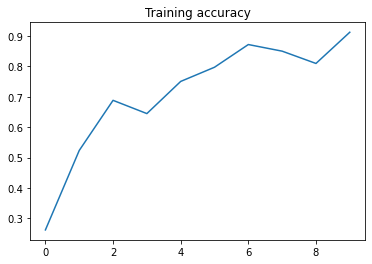

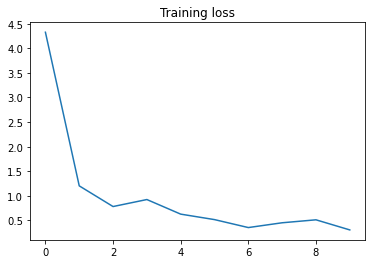

In [8]:
acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(acc))
plt.plot(epochs, acc)
plt.title ('Training accuracy')
plt.figure()
plt.plot(epochs, loss)
plt.title('Training loss')

In [9]:
model.evaluate(test_batches, verbose =1)

8/8 [==============================] - 13s 2s/step - loss: 0.5837 - accuracy: 0.8250


[0.5836873054504395, 0.824999988079071]

In [10]:
predictions = model.predict(test_batches, verbose =0)

In [11]:
cm = confusion_matrix(test_batches.classes, np.argmax(predictions, axis=-1))

In [12]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
        print('Normalized confusion matrix')
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    thresh = cm.max()/2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i,j], horizontalalignment='center', color='white' if cm[i,j]>thresh else 'black')
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [13]:
test_batches.class_indices

{'Keenu': 0, 'Mosumi': 1, 'Red blood': 2, 'Shakri': 3}

Confusion matrix, without normalization
[[20  0  0  0]
 [ 2 14  2  2]
 [ 2  2 16  0]
 [ 0  0  4 16]]


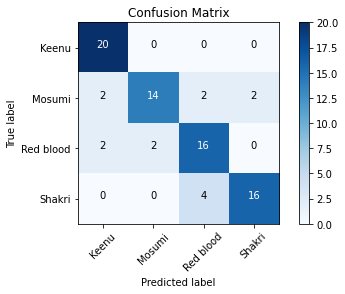

In [14]:
cm_plot_labels = ['Keenu', 'Mosumi', 'Red blood', 'Shakri']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')